# 001 Introduction

Importando as bibliotecas necessárias.



In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Definindo a janela principal e carregando a imagem em escala de cinza.

In [16]:
path_img = '/data/Documents/UFAL/repos/pdi/img/'
img_g = cv.imread(path_img + 'Lenna.png', cv.IMREAD_GRAYSCALE)
print(img_g.shape)

(512, 512)


O código abaixo não executaria apropriamente pois cv.imshow não renderiza no notebook.
```
cv.namedWindow('img', cv.WINDOW_KEEPRATIO)
cv.imshow('img', img)
```

Logo usamos o `pyplot`, como mostrado na próxima célula.

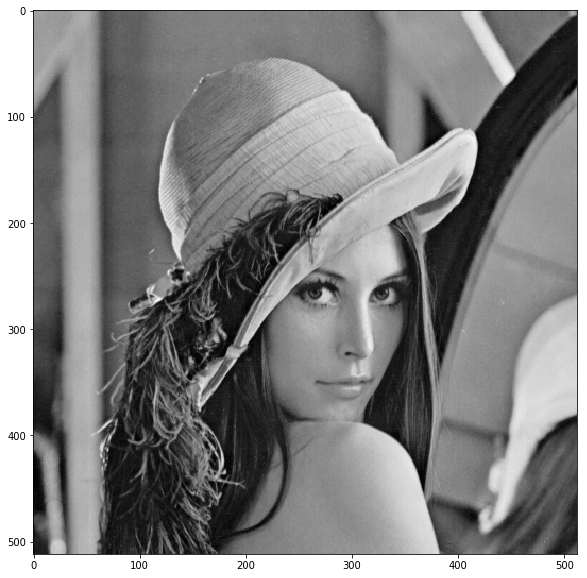

In [17]:
# pyplot como plt
plt.imshow(img_g, cmap='gray')
plt.show()

Carregando uma imagem colorida mudamos a flag de `cv.IMREAD_GRAYSCALE` para `cv.IMREAD_COLOR`.

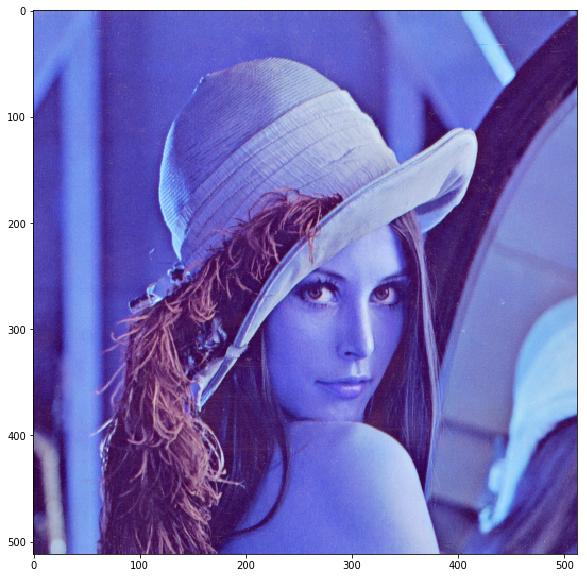

In [18]:
img = cv.imread(path_img + 'Lenna.png', cv.IMREAD_COLOR)
plt.imshow(img)
plt.show()

Ficou estranho, né? Isso acontece pois `opencv` ordena os canais RGB como BGR. Sendo assim, antes de mostrar a imagem precisamos convertê-la.

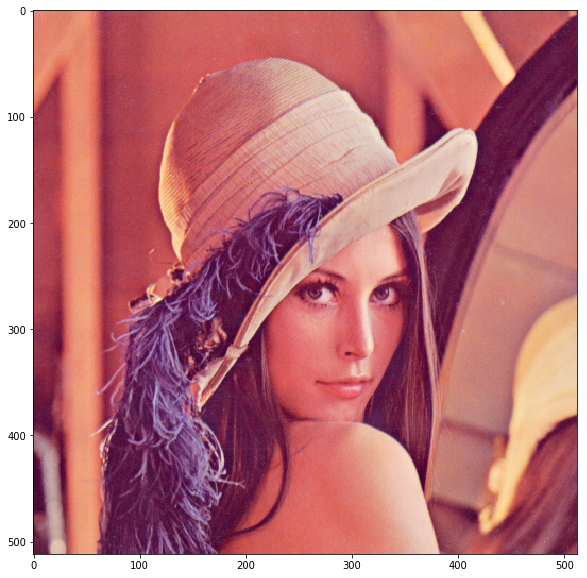

In [19]:
img_c = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_c)
plt.show()

Visualizando, agora, os três canais separadamente. Antes, no entanto, dividimos com `cv.split`.

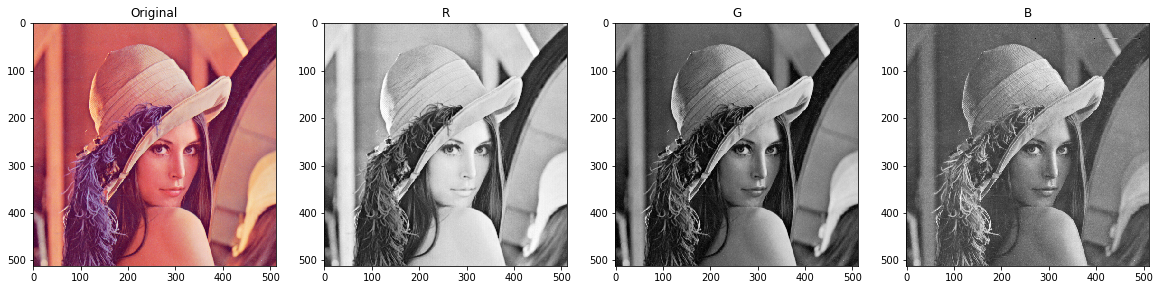

In [20]:
rgb = cv.split(img_c)

plt.rcParams['figure.figsize'] = [20, 10]  # Necessário para aumentar o tamanho da figura aqui no jupyter.
plt.subplot(141), plt.title('Original'), plt.imshow(img_c)
plt.subplot(142), plt.title('R'), plt.imshow(rgb[0], 'gray')
plt.subplot(143), plt.title('G'), plt.imshow(rgb[1], 'gray')
plt.subplot(144), plt.title('B'), plt.imshow(rgb[2], 'gray')
plt.show()

## Visualizando histogramas

Lembrando que `img_g` é a imagem da Lenna em escala de cinza, a usamos como entrada do método `plt.hist`.

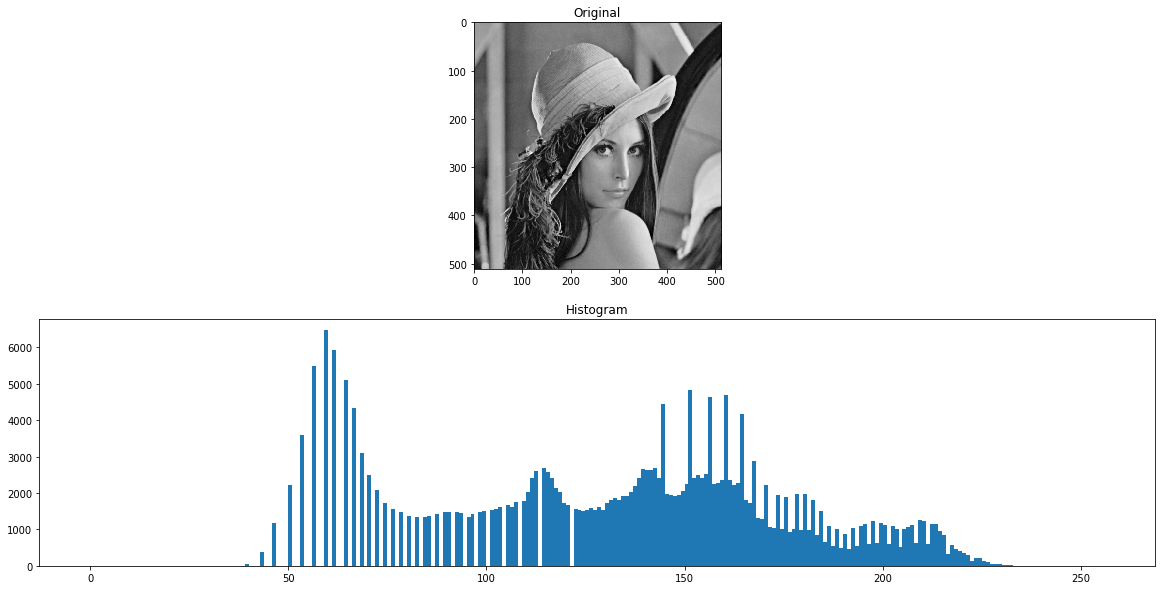

In [21]:
plt.subplot(211), plt.title("Original"), plt.imshow(img_g, 'gray')
plt.subplot(212), plt.title("Histogram"), plt.hist(img_g.ravel(), 256, [0, 256])
plt.show()
# Lembre que img_g.ravel() retorna img_g como um array de 1D.

Visualizando, agora, os histogramas de cada canal da imagem colorida, dessa vez com `cv.calcHist`.

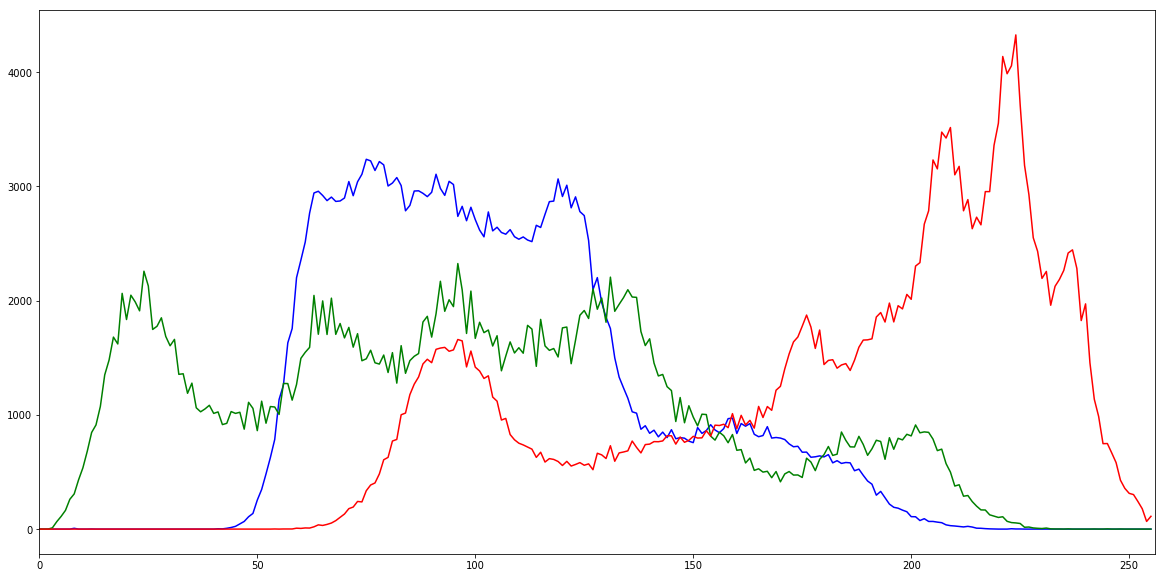

In [22]:
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.show()

## Criando imagens